In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [92]:
#X,Y = make_circles(n_samples=500,noise=0.2,factor=0.2)
X,Y = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]]), np.array([1,0,0,1])

print(X.shape,Y.shape)

(4, 2) (4,)


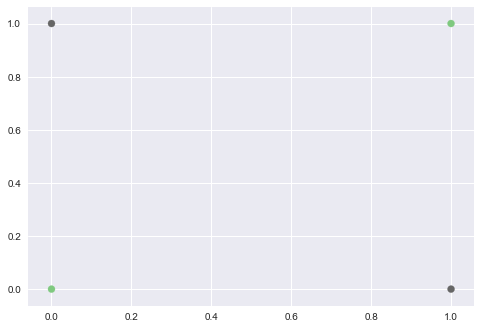

In [96]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent_r)
plt.show()

In [97]:
input_size = 2
# 3 Layer Network 2 - 4 H1 - 3H2 - 2 Output
layers = [4,3]
output = 2

In [98]:
#a = np.array([[10,20],[30,40]])
#print(np.sum(a,axis=1,keepdims=True))

In [99]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

In [100]:
a = np.array([[20,10],
              [20,20]])
softmax(a)

array([[9.99954602e-01, 4.53978687e-05],
       [5.00000000e-01, 5.00000000e-01]])

In [101]:
class NeuralNetwork:
    def __init__(self,input_size,hidden_layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,hidden_layers[0])
        model['b1'] = np.zeros((1,hidden_layers[0]))
        
        model['W2'] = np.random.randn(hidden_layers[0],hidden_layers[1])
        model['b2'] = np.zeros((1,hidden_layers[1]))
        
        model['W3'] = np.random.randn(hidden_layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
    
    def forward(self,x):
        W1, W2, W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        # Store the outputs of each layer for backpropagation later
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1, W2, W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_ = self.activation_outputs
        
        # Final Layer
        delta3 = y_ - y 
        
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = np.dot(delta3,W3.T)*(1-np.square(a2))
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = np.dot(delta2,W2.T)*(1-np.square(a1))
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        #Gradient Descent
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
    def predict(self,x):
        y_pred = self.forward(x)
        return np.argmax(y_pred,axis=1)
        
    

In [102]:
def loss(y_oht,pred):
    l = -np.mean(y_oht*np.log(pred))
    return l

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [103]:
#labels = one_hot(np.array([0, 0, 1, 2]),depth=3)
#print(labels)

In [104]:
model = NeuralNetwork(input_size=2,hidden_layers=layers,output_size=2)

In [105]:
# Random Prediction in the Begining
print(model.forward(X[0].reshape(1,-1)))
print(Y[0])

[[0.5 0.5]]
1


In [106]:
def train(X,Y,model,epochs=50):
    train_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for epoch in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        model.backward(X,Y_OHT)
        train_loss.append(l)
        
        if epoch%5==0:
            print("Epoch %d Loss %.4f"%(epoch,l))
            
    plt.plot(train_loss)
    plt.show()
    
        
    

Epoch 0 Loss 0.7328
Epoch 5 Loss 0.6886
Epoch 10 Loss 0.6470
Epoch 15 Loss 0.6073
Epoch 20 Loss 0.5686
Epoch 25 Loss 0.5305
Epoch 30 Loss 0.4931
Epoch 35 Loss 0.4568
Epoch 40 Loss 0.4227
Epoch 45 Loss 0.3919
Epoch 50 Loss 0.3652
Epoch 55 Loss 0.3428
Epoch 60 Loss 0.3245
Epoch 65 Loss 0.3095
Epoch 70 Loss 0.2973
Epoch 75 Loss 0.2871
Epoch 80 Loss 0.2786
Epoch 85 Loss 0.2713
Epoch 90 Loss 0.2650
Epoch 95 Loss 0.2595
Epoch 100 Loss 0.2547
Epoch 105 Loss 0.2503
Epoch 110 Loss 0.2464
Epoch 115 Loss 0.2429
Epoch 120 Loss 0.2397
Epoch 125 Loss 0.2368
Epoch 130 Loss 0.2341
Epoch 135 Loss 0.2316
Epoch 140 Loss 0.2293
Epoch 145 Loss 0.2272
Epoch 150 Loss 0.2251
Epoch 155 Loss 0.2232
Epoch 160 Loss 0.2214
Epoch 165 Loss 0.2197
Epoch 170 Loss 0.2180
Epoch 175 Loss 0.2165
Epoch 180 Loss 0.2150
Epoch 185 Loss 0.2135
Epoch 190 Loss 0.2121
Epoch 195 Loss 0.2107
Epoch 200 Loss 0.2094
Epoch 205 Loss 0.2081
Epoch 210 Loss 0.2069
Epoch 215 Loss 0.2056
Epoch 220 Loss 0.2044
Epoch 225 Loss 0.2032
Epoch 230 

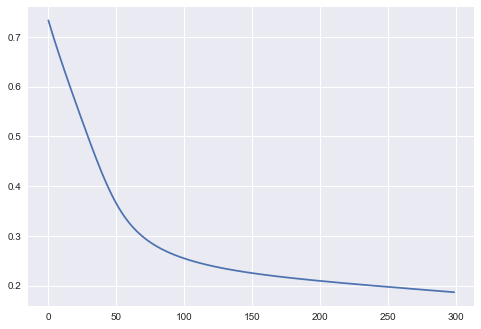

In [107]:
train(X,Y,model,300)

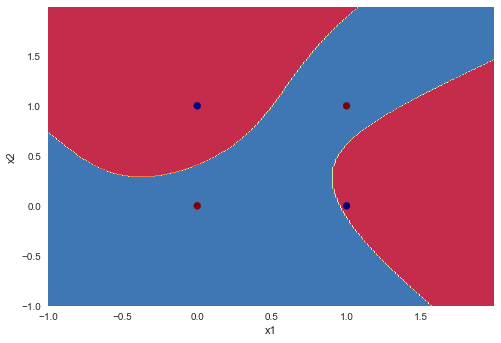

In [108]:
from visualize import plot_decision_boundary


plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [109]:
pred = model.predict(X)

In [110]:
print(pred)

[1 0 0 1]


In [111]:
acc = np.sum((pred==Y))/Y.shape[0]
print(acc)

1.0
